In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Random Forests**

In previous lessons we've covered the basics of decision trees and bootstrap aggregating, but in this lesson, we'll turn our spotlight solely on Random Forests.

*Why Random Forests?*

  A random forest uses the age old saying "two (or more) heads are better" than one and applies it to decsion trees. We saw that a decision tree splits the dataset on various features and that it's essential to place priority on feature splits that best seperate the dataset.

Even though they are widely applicable and easy to visualize, *decision trees have their downsides*:
- At *high depths*, they can create unnecessarily complex trees that *overfit* the data.
- Can be very unpredictable when slightly changing up the dataset.
- Since decision trees rely on *heuristics* (basically a user defined metric to say how well the tree is splitting up the dataset) those heuristics can't be guaranteed to always find the optimum tree.

These above problems that a single decision tree faces can be mitigated by a little help from its friends... more decision trees!

Essentially a random forest divys up the tasks of finding the best features to split on among different decision trees and let's them run their course on these features. After some defined time to stop, the trees congregate together in an *ensemble* to compare their findings and find an average feature split that works best off of what they've found.




*Let's Explore This Forest! But, First, A Little Recap*

I know, I want to get right to creating these strange things called Random Forests too, but we need to take a step back and make sure we understand how decision trees work.

--------------------- CREATE FUNCTIONS FOR GINI IMPURITY, ENTROPY ------------

In [ ]:
probs = [.13, .37, .19, .31]

In [ ]:
def gini_impurity(probs):
  ## -- TO DO -- ##
  out = 0.0
  hmm = sum()
  return hmm

In [ ]:
impurity = gini_impurity(probabilities)
print(impurities)

[0.1131, 0.2331, 0.1539, 0.21389999999999998]


--------------------- INTRODUCTION TO DATABASE + LINK ------------

Let's first import this dataset, and see how we can divide our MPG values into classes to get the ball (or wheel) rolling!

Largest (Most Efficient) MPG:  46.6
Smallest (Least Efficient) MPG:  9.0


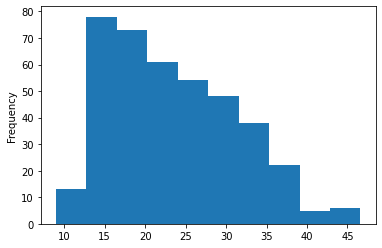

In [ ]:
#import the auto-mpg csv in using pandas
cars = pd.read_csv("auto-mpg.csv")

## TO DO ##
## Plot the mpg values using pandas as a histogram ##
cars.mpg.plot(kind='hist')

mpg_max = max(cars.mpg)
mpg_min = min(cars.mpg)
print("Largest (Most Efficient) MPG: ", mpg_max) ## SHOULD EQUAL 46.6
print("Smallest (Least Efficient) MPG: ", mpg_min) ## SHOULD EQUAL 9.0

What did you find as the largest and smallest miles per gallons?

As we can see, there's quite a range in MPG that a car could have. They are also skewed to one side.

To make our process easier, lets divide our data up into four named categories, depending on the range of MPGs it falls under and how much we'd want to buy it.
- **0:**  (5.0 < MPG <= 14.9)
- **1:**  (15.0 < MPG <= 24.9)
- **2:**  (25.0 < MPG <= 34.9)
- **3:**  ( 35.0 < MPG <= 50.0)


Let's now create a **desirability** array from the MPG column of the **cars** dataset, where if the MPG falls into a certain value range as specified above, we insert the corresponding value.

In [ ]:
# Should return an array containing the desirability ranking deduced from the mpg 
# cars_dataset: 
def desire_creator(cars_dataset):
  desires = []
  ## -- TO DO -- ##
  for mpg in np.asarray(cars_dataset.mpg):
    if (mpg > 5.0 and mpg <= 14.9):
      desires.append(0)
    elif (mpg >= 15.0 and mpg <= 24.9):
      desires.append(1)
    elif (mpg >= 25.0 and mpg <= 34.9):
      desires.append(2)
    elif (mpg >= 35.0 and mpg <= 50.0):
      desires.append(3)
    else:
      raise Exception("Unexpected MPG:", mpg)
    ## -- END -- ##
  return np.asarray(desires)

In [ ]:
desirability = desire_creator(cars)

------ CODE FOR HISTOGRAM OF THE DESIRABILITIES AND THEIR COUNTS -------------

Let's create a new dataset named **cars_and_desires** replacing the **mpg** column with **desirability**.

Since sklearn's random tree classifier only works numeric data, we'll have to drop the **car name** and **horspepower** columns, since they are *string* and *object* types respectively.

In [ ]:
## -- TO DO: -- ##
cars_and_desires = cars.copy()
cars_and_desires.columns
cars_and_desires = cars_and_desires.drop(['mpg'], axis=1)
cars_and_desires = cars_and_desires.drop(['car name'], axis=1)
cars_and_desires = cars_and_desires.drop(['horsepower'], axis=1)
cars_and_desires['desirability'] = desirability
## -- END -- ##

In [ ]:
cars_and_desires

,cylinders,displacement,weight,acceleration,model year,origin,desirability
0,8,307.0,3504,12.0,70,1,1
1,8,350.0,3693,11.5,70,1,1
2,8,318.0,3436,11.0,70,1,1
3,8,304.0,3433,12.0,70,1,1
4,8,302.0,3449,10.5,70,1,1
...,...,...,...,...,...,...,...
393,4,140.0,2790,15.6,82,1,2
394,4,97.0,2130,24.6,82,2,3
395,4,135.0,2295,11.6,82,1,2
396,4,120.0,2625,18.6,82,1,2


Now that we have our data/attributes and labels together... the only logical thing to do now is split them apart.

We need to make our data X and our features y, to then train our random forest. 



In [ ]:
# Splits the dataset into an X of the data/attributes, and y of the features on a given index.
# dataset: incoming dataset to be split
# index: the index of final column that is be split off to create the features
def data_label_splitter(dataset, index):
  ## -- TO DO -- ##
  X = cars_and_desires.iloc[:, 0:index]
  y = cars_and_desires.iloc[:, index] 
  ## -- END -- ##
  return X, y

Let's now fil in this function to divide our X and y into test trains splits.

# *Hint:* Look at the imports at the top of the page

In [ ]:
# Splits the dataset into testing and training data:
# X: The data matrix
# y: The labels column
# test_fraction: What fraction (float) of the data will go to the test set
def train_test_splitter(X, y, test_fraction):
  ##-- TO DO --##
  return train_test_split(X, y, test_size=test_fraction, random_state = 0)
  ## -- END -- ##


I know filling out these functions is annoying -- they'll come in handy later, I swear. Fill in the method parameters below. Let's first have our testing data to be $\frac{2}{10}$ of the overall dataset.

In [ ]:
test_fraction = 0.2 ## Assign fraction value
X, y = data_label_splitter(cars_and_desires, 6) ## Fill in method parameter
X_train, X_test, y_train, y_test = test_train_splitter(X, y, test_fraction) ## Fill in method parameters

Ok, so now we finally have our test and training data set up. All we have to do is create a Decision Tree Classifier and see how it does.

In [ ]:
tree_classifier = DecisionTreeClassifier(random_state=0) ## To Fill In
tree_classifier.fit(X_train, y_train) # To Fill in 
tree_y_pred = tree_classifier.predict(X_test) #To Fill in 

print(classification_report(y_test, tree_y_pred))
print(accuracy_score(y_test,tree_y_pred))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.82      0.68      0.74        40
           2       0.63      0.90      0.75        21
           3       0.80      0.44      0.57         9

    accuracy                           0.70        80
   macro avg       0.69      0.66      0.65        80
weighted avg       0.73      0.70      0.70        80

0.7


In [ ]:
forest_classifier = RandomForestClassifier(n_estimators=500)
forest_classifier.fit(X_train, y_train)
forest_y_pred = forest_classifier.predict(X_test)



print(classification_report(y_test, forest_y_pred))
print(accuracy_score(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.91      0.72      0.81        40
           2       0.58      0.90      0.70        21
           3       1.00      0.22      0.36         9

    accuracy                           0.74        80
   macro avg       0.79      0.69      0.66        80
weighted avg       0.80      0.74      0.73        80

0.7375
